Dans ce notebook, on va lire le fichier .csv en espérant trouver une approche qui marche.

# 1ère tentative 

On va essayer de splitter les données en fonction de l'année (header Procédure : QJM - Année : 1888 par exemple).


In [1]:
lines = open('data/qjm_724bb7546a56afc333a5983a5b711b8e_1885_2016.csv', encoding='latin1').read()

In [2]:
len(lines)

713672

In [3]:
sublines = lines[:200000]

In [4]:
import re

In [5]:
year_delimiter = re.compile('Procédure : QJM - Année : (\d\d\d\d)')

In [6]:
splits = year_delimiter.split(sublines)

On s'attend à ce que le split commence dès le début donc on peut anticiper le fait que le premier split va être `''`, et qu'ensuite on va avoir une année puis un bout de texte:

In [7]:
len(splits)

61

In [8]:
splits[0]

''

In [9]:
splits[1]

'1885'

In [10]:
splits[3]

'1886'

On peut maintenant essayer de s'attaquer à un bloc. Par exemple 1886 (1885 est incomplet).

In [11]:
block = splits[4]

In [12]:
block

"\n\nCode station;Libellé station;Bassin versant (km²);Producteur;E-mail;\nH5920011;La Seine à Paris [Austerlitz avant création lacs];43800;DRIEE IDF;marc.valente@developpement-durable.gouv.fr;\n\nAnnée;1886;\n;\nDébits mensuels en m3/s;\n;QMM;QMN;V;\nJ;867.00;867.00;#;;\nF;875.00;875.00;#;;\nM;655.00;655.00;#;;\nA;283.00;283.00;#;;\nM;212.00;212.00;#;;\nJ;304.00;304.00;#;;\nJ;153.00;153.00;#;;\nA;;;;;\nS;111.00;111.00;#;;\nO;139.00;139.00;#;;\nN;239.00;239.00;#;;\nD;657.00;657.00;#;;\n\nStatistiques;\n;;Janvier;Février;Mars;Avril;Mai;Juin;Juillet;Août;Septembre;Octobre;Novembre;Décembre;1886\nEcoulement mensuel;Validité;Estimé;Estimé;Estimé;Estimé;Estimé;Estimé;Estimé;;Estimé;Estimé;Estimé;Estimé;;\n;Débit moyen (m3/s);867.00;875.00;655.00;283.00;212.00;304.00;153.00;;111.00;139.00;239.00;657.00;;\n;Débit moyen spécifique (l/s/km2);19.80;20.00;15.00;6.47;4.83;6.94;3.50;;2.54;3.18;5.46;15.00;;\n;Lame d'eau (mm);53.00;48.30;40.10;16.80;12.90;18.00;9.40;;6.60;8.50;14.20;40.20;;\n;\nEcoul

On va splitter le bloc sur le label maximum instantané.

In [13]:
block.split('Maximum instantané')[1].splitlines()[:4]

[';Débit (m3/s);1170.00;1320.00;995.00;401.00;348.00;442.00;348.00;207.00;149.00;348.00;488.00;1070.00;;',
 ';Date;30/01/1886\xa008:00;04/02/1886\xa015:00;08/03/1886\xa008:00;12/04/1886\xa008:00;14/05/1886\xa008:00;12/06/1886\xa015:00;01/07/1886\xa008:00;02/08/1886\xa008:00;11/09/1886\xa015:00;19/10/1886\xa015:00;20/11/1886\xa008:00;31/12/1886\xa015:00;\xa0;',
 ';Hauteur (cm);400.00;460.00;330.00;140.00;130.00;150.00;130.00;110.00;100.00;130.00;160.00;360.00;460.00;',
 ';Date;30/01/1886\xa008:00;04/02/1886\xa015:00;08/03/1886\xa008:00;12/04/1886\xa008:00;14/05/1886\xa008:00;12/06/1886\xa015:00;01/07/1886\xa008:00;02/08/1886\xa008:00;11/09/1886\xa015:00;19/10/1886\xa015:00;20/11/1886\xa008:00;31/12/1886\xa015:00;04/02/1886\xa015:00;']

Finalement, on peut extraire les données de débit avec les dates associées et les données de hauteur d'eau.

In [14]:
import pandas as pd
from io import StringIO

/Users/kappamaki/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [15]:
q = pd.read_csv(StringIO("\n".join(block.split('Maximum instantané')[1].splitlines()[:2])),
               sep=';', header=None, usecols=range(1, 14)).transpose()
q

,0,1
1,Débit (m3/s),Date
2,1170.00,30/01/1886 08:00
3,1320.00,04/02/1886 15:00
4,995.00,08/03/1886 08:00
5,401.00,12/04/1886 08:00
6,348.00,14/05/1886 08:00
7,442.00,12/06/1886 15:00
8,348.00,01/07/1886 08:00
9,207.00,02/08/1886 08:00
10,149.00,11/09/1886 15:00


In [16]:
h = pd.read_csv(StringIO("\n".join(block.split('Maximum instantané')[1].splitlines()[2:4])),
               sep=';', header=None, usecols=range(1, 14)).transpose()
h

,0,1
1,Hauteur (cm),Date
2,400.00,30/01/1886 08:00
3,460.00,04/02/1886 15:00
4,330.00,08/03/1886 08:00
5,140.00,12/04/1886 08:00
6,130.00,14/05/1886 08:00
7,150.00,12/06/1886 15:00
8,130.00,01/07/1886 08:00
9,110.00,02/08/1886 08:00
10,100.00,11/09/1886 15:00


On va voir ce qui se passe quand on a des données manquantes :

In [17]:
from ipywidgets import interact

In [18]:
@interact
def display_q(index=(0, int((len(splits) - 1)/2) - 1)):
    "Displays dataframe for q obtained from splits."
    block = splits[1 + 2 * index + 1]
    q = pd.read_csv(StringIO("\n".join(block.split('Maximum instantané')[1].splitlines()[:2])),
               sep=';', header=None, usecols=range(1, 14)).transpose()
    print(q)

               0                 1
1   Débit (m3/s)              Date
2         947.00  18/01/1899 08:00
3            NaN                  
4            NaN                  
5            NaN                  
6            NaN                  
7            NaN                  
8            NaN                  
9            NaN                  
10           NaN                  
11           NaN                  
12           NaN                  
13           NaN                  


In [19]:
@interact
def display_h(index=(0, int((len(splits) - 1)/2) - 1)):
    "Displays dataframe for q obtained from splits."
    block = splits[1 + 2 * index + 1]
    h = pd.read_csv(StringIO("\n".join(block.split('Maximum instantané')[1].splitlines()[2:4])),
               sep=';', header=None, usecols=range(1, 14)).transpose()
    print(h)

               0                 1
1   Hauteur (cm)              Date
2         310.00  18/01/1899 08:00
3         180.00  01/02/1899 08:00
4            NaN                  
5            NaN                  
6            NaN                  
7            NaN                  
8            NaN                  
9            NaN                  
10           NaN                  
11           NaN                  
12           NaN                  
13           NaN                  


On peut maintenant écrire le code d'extraction de la série de débit.

In [28]:
def extract_q_from_block(block):
    "Returns a pandas Series from a block of q values, indexed by date."
    q = pd.read_csv(StringIO("\n".join(block.split('Maximum instantané')[1].splitlines()[:2])),
               sep=';', header=None, 
                    usecols=range(1, 14)).transpose().drop(1).rename(columns={0:'q', 1:'date'}).dropna()
    index = pd.to_datetime(q.pop('date').str.replace('\xa0', ' '), dayfirst=True)
    q = q.set_index(index)
    q = q.astype(float)
    return q

In [29]:
extract_q_from_block(block)

,q
date,
1886-01-30 08:00:00,1170.0
1886-02-04 15:00:00,1320.0
1886-03-08 08:00:00,995.0
1886-04-12 08:00:00,401.0
1886-05-14 08:00:00,348.0
1886-06-12 15:00:00,442.0
1886-07-01 08:00:00,348.0
1886-08-02 08:00:00,207.0
1886-09-11 15:00:00,149.0


In [30]:
@interact
def test_q_extraction(index=(0, int((len(splits) - 1)/2) - 1)):
    "Tests extraction of q on splits."
    block = splits[1 + 2 * index + 1]
    print(extract_q_from_block(block))

                          q
date                       
1911-01-01 00:01:00  1140.0
1911-02-27 15:00:00   666.0
1911-03-18 08:00:00   650.0
1911-04-01 00:01:00   583.0
1911-05-02 08:00:00   207.0
1911-06-06 08:00:00   207.0
1911-07-01 08:00:00   176.0
1911-08-13 08:00:00   294.0
1911-09-30 23:59:00   113.0
1911-10-29 08:00:00   195.0
1911-11-25 15:00:00   657.0
1911-12-28 15:00:00   991.0


In [31]:
df = pd.DataFrame([['a', 'b'], [1, 2]])
df

,0,1
0,a,b
1,1,2


In [32]:
df.drop(0)

,0,1
1,1,2


In [33]:
df

,0,1
0,a,b
1,1,2


In [34]:
df.rename(columns={0:'a', 1:'b'})

,a,b
0,a,b
1,1,2


In [35]:
df

,0,1
0,a,b
1,1,2


On peut maintenant faire la fonction d'extraction des hauteurs :

In [38]:
def extract_h_from_block(block):
    "Returns a pandas Series from a block of q values, indexed by date."
    h = pd.read_csv(StringIO("\n".join(block.split('Maximum instantané')[1].splitlines()[2:4])),
               sep=';', header=None, usecols=range(1, 14)).transpose().drop(1).rename(columns={0:'h', 1:'date'}).dropna()
    index = pd.to_datetime(h.pop('date').str.replace('\xa0', ' '), dayfirst=True)
    h = h.set_index(index)
    h = h.astype(float)
    return h

In [39]:
@interact
def test_h_extraction(index=(0, int((len(splits) - 1)/2) - 1)):
    "Tests extraction of h on splits."
    block = splits[1 + 2 * index + 1]
    print(extract_h_from_block(block))

                         h
date                      
1888-01-24 15:00:00  170.0
1888-02-13 15:00:00  260.0
1888-03-18 08:00:00  400.0
1888-04-03 08:00:00  380.0
1888-05-01 00:01:00  275.0
1888-06-29 15:00:00  130.0
1888-07-20 08:00:00  180.0
1888-08-02 08:00:00  180.0
1888-09-06 08:00:00  110.0
1888-10-14 15:00:00  140.0
1888-11-30 15:00:00  150.0
1888-12-03 15:00:00  190.0


# Extraction du dataset 

In [40]:
import numpy as np

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

## Débit 

In [42]:
splits = year_delimiter.split(lines)
q_df = pd.concat([extract_q_from_block(block) for block in splits[2::2]])

<IPython.core.display.Javascript object>


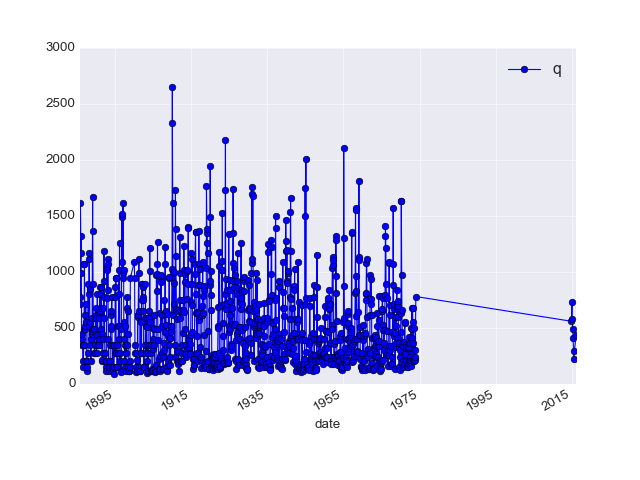

In [43]:
fig, ax = plt.subplots()
q_df.plot.line(style='-o', ax=ax)

## Hauteurs

In [44]:
splits = year_delimiter.split(lines)
h_df = pd.concat([extract_h_from_block(block) for block in splits[2::2]])

<IPython.core.display.Javascript object>


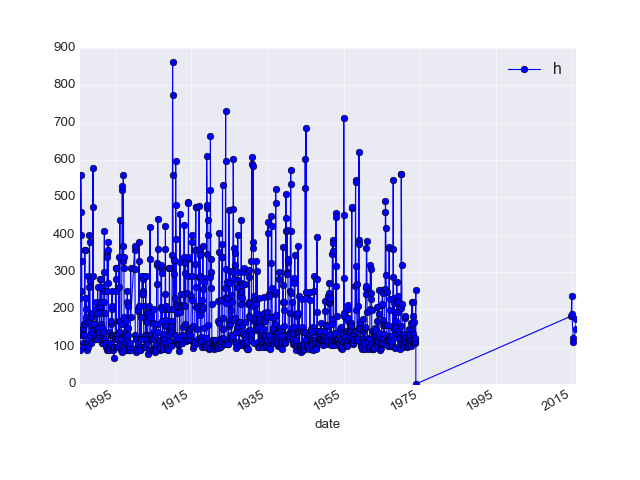

In [45]:
fig, ax = plt.subplots()
h_df.plot.line(style='-o', ax=ax)

# Export 

In [36]:
q_df.to_csv('data/export_q.csv')

In [37]:
h_df.to_csv('data/export_h.csv')

# Et depuis 1974 ? 

In [47]:
lines = open('data/qjm_5e6749ff5c8a98684d119f2a75d50c60_1974_2016.csv', encoding='latin1').read()

In [48]:
splits = year_delimiter.split(lines)
h_df2 = pd.concat([extract_h_from_block(block) for block in splits[2::2]])
# conversion vers des cm
h_df2.h = h_df2.h / 10
h_df2 = h_df2[h_df2.h > 0]

<IPython.core.display.Javascript object>


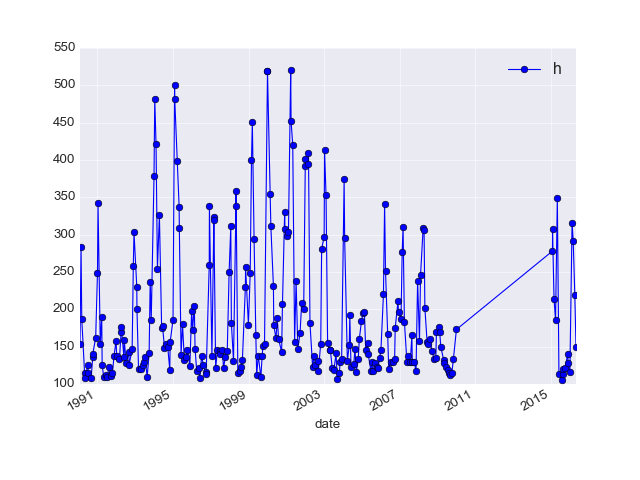

In [49]:
fig, ax = plt.subplots()
h_df2.plot.line(style='-o', ax=ax)

In [51]:
q_df2 = pd.concat([extract_q_from_block(block) for block in splits[2::2]])

In [52]:
q_df2

,q
date,


# Comparaison avant et après 

<IPython.core.display.Javascript object>


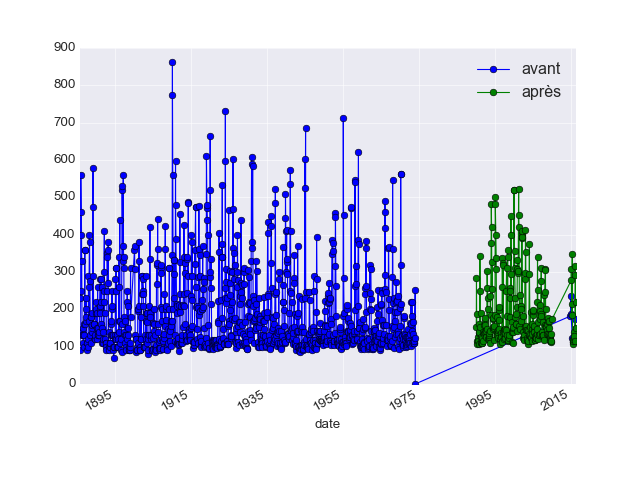

In [53]:
fig, ax = plt.subplots()
h_df.h.plot.line(style='-o', ax=ax, label='avant')
h_df2.h.plot.line(style='-o', ax=ax, label='après')
plt.legend()

On va rajouter la moyenne aussi :

In [54]:
h_df['h_moyen'] = [h_df.h.mean() for _ in h_df.h]

In [55]:
h_df2['h_moyen'] = [h_df2.h.mean() for _ in h_df2.h]

<IPython.core.display.Javascript object>


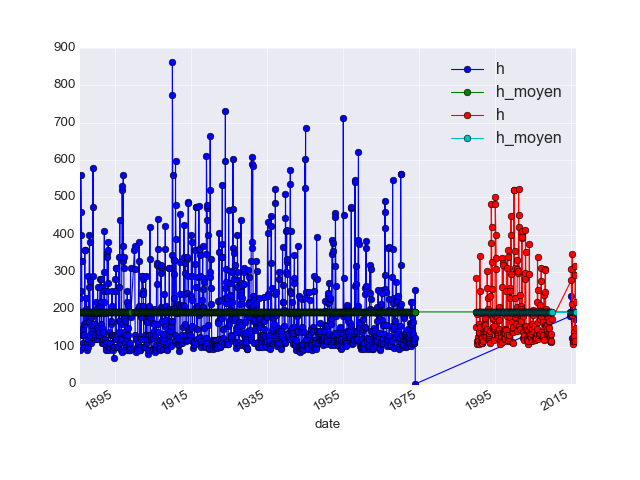

In [56]:
fig, ax = plt.subplots()
h_df.plot.line(style='-o', ax=ax, label='avant')
h_df2.plot.line(style='-o', ax=ax, label='après')
plt.legend()

On regarde les histogrammes :

<IPython.core.display.Javascript object>


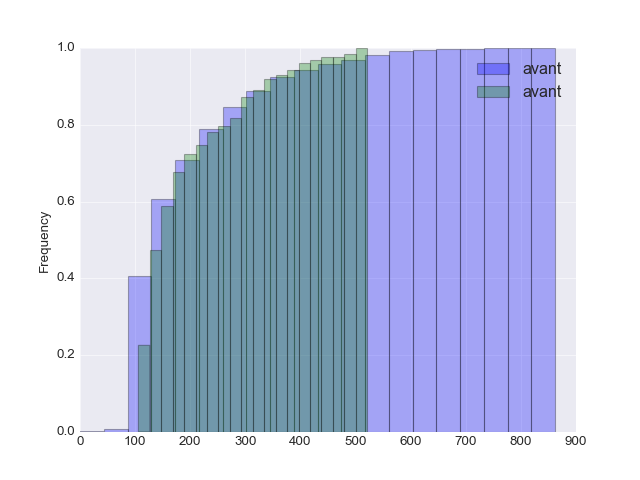

In [57]:
fig, ax = plt.subplots()
h_df.h.plot.hist(ax=ax, label='avant', cumulative=True, normed=True, bins=20, alpha=0.3)
h_df2.h.plot.hist(ax=ax, label='avant', cumulative=True, normed=True, bins=20, alpha=0.3)
plt.legend()

<IPython.core.display.Javascript object>


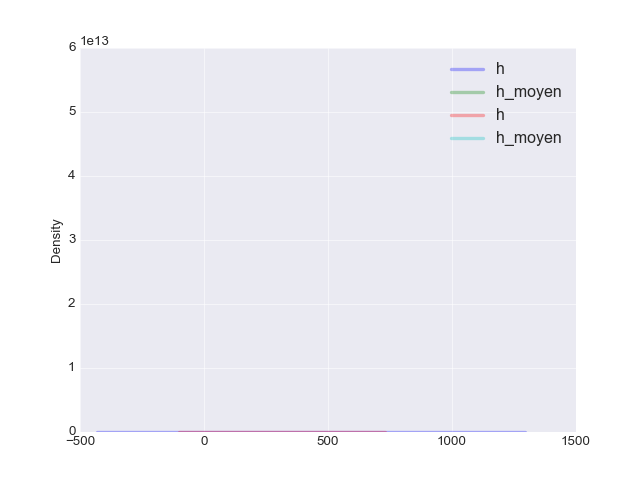

In [58]:
fig, ax = plt.subplots()
h_df.plot.kde(ax=ax, label='avant', alpha=0.3, lw=3)
h_df2[h_df2.h > 0].plot.kde(ax=ax, label='avant', alpha=0.3, lw=3)

## Test statistique 

On s'inspire comme d'habitude d'Allen Downey :

- Think Stats 2 <http://greenteapress.com/thinkstats2/html/thinkstats2010.html>
- Blog post there is only one test : <http://allendowney.blogspot.fr/2016/06/there-is-still-only-one-test.html>
- JakeVDP <https://www.youtube.com/watch?v=-7I7MWTX0gA>

In [59]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()


class DiffMeansPermute(HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [60]:
group1 = h_df.h.values
group2 = h_df2.h.values

In [61]:
group1.mean()

193.04716446124763

In [62]:
group2.mean()

194.08949416342412

In [63]:
test_data = (group1, group2)
test = DiffMeansPermute(data=test_data)

In [64]:
test.PValue(iters=50000)

0.89412

In [65]:
test.TestStatistic(test_data)

1.0423297021764881

<IPython.core.display.Javascript object>


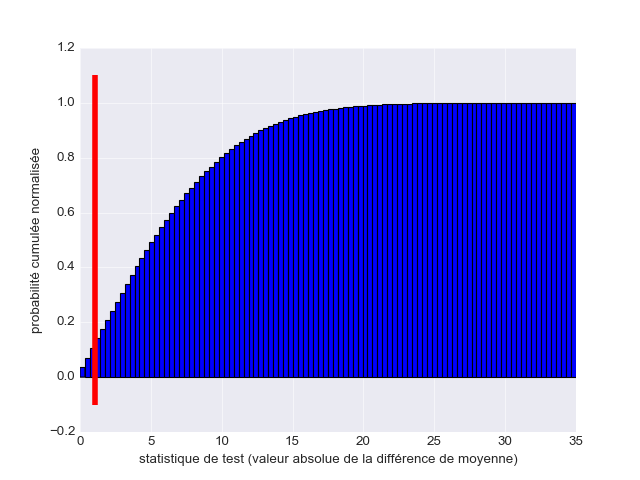

In [66]:
plt.figure()
plt.hist(test.test_stats, cumulative=True, bins=100, normed=True)
plt.vlines(test.TestStatistic(test_data), -0.1, 1.1, lw=5, colors='red')
plt.xlabel('statistique de test (valeur absolue de la différence de moyenne)')
plt.ylabel('probabilité cumulée normalisée')

# Exportation du fichier complet pour les hauteurs

In [67]:
pd.concat([h_df, h_df2])[['h']].to_csv('data/export_h_complet.csv')

# Extraction des débits à partir des blocs élémentaires 

On repart à partir du bloc et on essaye de splitter pour extraire les infos dont on a besoin :

In [95]:
block.split('Débits journaliers')[1].splitlines()[3:]

['1;502.00;Estimé;1110.00;;380.00;Estimé;356.00;Estimé;278.00;Estimé;157.00;Estimé;308.00;Estimé;140.00;Estimé;81.90;Estimé;115.00;Estimé;118.00;Estimé;157.00;Estimé;',
 '2;436.00;Estimé;1170.00;;418.00;Estimé;343.00;Estimé;278.00;Estimé;138.00;Estimé;270.00;Estimé;168.00;Estimé;99.50;Estimé;113.00;Estimé;131.00;Estimé;131.00;Estimé;',
 '3;459.00;Estimé;1240.00;;609.00;;284.00;Estimé;278.00;Estimé;163.00;Estimé;206.00;Estimé;135.00;Estimé;114.00;Estimé;102.00;Estimé;147.00;Estimé;115.00;Estimé;',
 '4;541.00;;1300.00;;897.00;;278.00;Estimé;234.00;Estimé;135.00;Estimé;183.00;Estimé;131.00;Estimé;115.00;Estimé;117.00;Estimé;146.00;Estimé;118.00;Estimé;',
 '5;599.00;;1320.00;;919.00;;278.00;Estimé;158.00;Estimé;149.00;Estimé;201.00;Estimé;133.00;Estimé;113.00;Estimé;143.00;Estimé;124.00;Estimé;147.00;Estimé;',
 '6;754.00;;1320.00;;922.00;;278.00;Estimé;172.00;Estimé;192.00;Estimé;158.00;Estimé;167.00;Estimé;102.00;Estimé;117.00;Estimé;172.00;Estimé;146.00;Estimé;',
 '7;845.00;;1290.00;;950

In [91]:
q_max = pd.read_csv(StringIO("\n".join(block.split('Débits journaliers')[1].splitlines()[3:])),
               sep=';', header=None, usecols=np.arange(1, 2*12, 2)).max(axis=0)
q_max

1     1160.0
3     1320.0
5      992.0
7      388.0
9      300.0
11     414.0
13     308.0
15     185.0
17     136.0
19     283.0
21     431.0
23    1050.0
dtype: float64

In [103]:
year = re.findall('Année;(\d\d\d\d)', block)[0]
year

'1886'

In [104]:
q_max.index = pd.date_range(start='{}-01-01'.format(year), periods=12, freq='M')

In [105]:
q_max

1886-01-31    1160.0
1886-02-28    1320.0
1886-03-31     992.0
1886-04-30     388.0
1886-05-31     300.0
1886-06-30     414.0
1886-07-31     308.0
1886-08-31     185.0
1886-09-30     136.0
1886-10-31     283.0
1886-11-30     431.0
1886-12-31    1050.0
Freq: M, dtype: float64

<IPython.core.display.Javascript object>


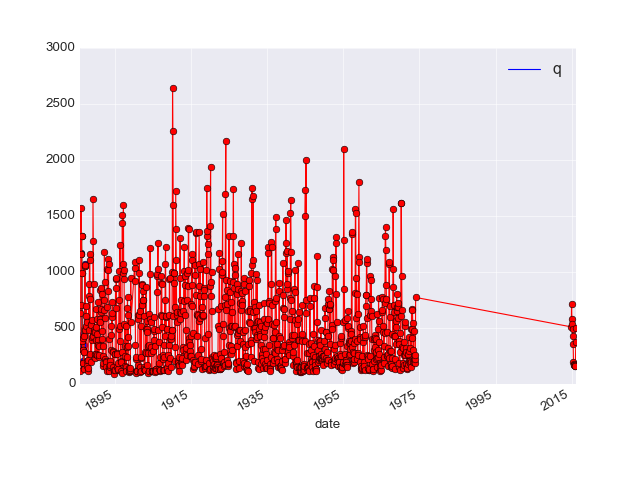

In [109]:
extract_q_from_block(block).plot(style='-o')
q_max.plot(style='-o')

In [110]:
def extract_q_from_block_using_max(block):
    "Extracts q from block of data, using max over all days of the months."
    q_max = pd.read_csv(StringIO("\n".join(block.split('Débits journaliers')[1].splitlines()[3:])),
               sep=';', header=None, usecols=np.arange(1, 2*12, 2)).max(axis=0)
    year = re.findall('Année;(\d\d\d\d)', block)[0]
    q_max.index = pd.date_range(start='{}-01-01'.format(year), periods=12, freq='M')
    return q_max

In [111]:
extract_q_from_block(block)

,q
date,
1886-01-30 08:00:00,1170.0
1886-02-04 15:00:00,1320.0
1886-03-08 08:00:00,995.0
1886-04-12 08:00:00,401.0
1886-05-14 08:00:00,348.0
1886-06-12 15:00:00,442.0
1886-07-01 08:00:00,348.0
1886-08-02 08:00:00,207.0
1886-09-11 15:00:00,149.0


In [112]:
extract_q_from_block_using_max(block)

1886-01-31    1160.0
1886-02-28    1320.0
1886-03-31     992.0
1886-04-30     388.0
1886-05-31     300.0
1886-06-30     414.0
1886-07-31     308.0
1886-08-31     185.0
1886-09-30     136.0
1886-10-31     283.0
1886-11-30     431.0
1886-12-31    1050.0
Freq: M, dtype: float64

On vérifie que ça marche sur le dataset complet :

In [113]:
@interact
def test_q_extraction_using_max(index=(0, int((len(splits) - 1)/2) - 1)):
    "Tests extraction of h on splits."
    block = splits[1 + 2 * index + 1]
    print(extract_q_from_block_using_max(block))

1979-01-31     490.0
1979-02-28    1160.0
1979-03-31    1200.0
1979-04-30    1130.0
1979-05-31     570.0
1979-06-30     680.0
1979-07-31     190.0
1979-08-31     165.0
1979-09-30     155.0
1979-10-31     240.0
1979-11-30     440.0
1979-12-31     800.0
Freq: M, dtype: float64


## Préparation du fichier de données Q complet 

In [116]:
lines = open('data/qjm_724bb7546a56afc333a5983a5b711b8e_1885_2016.csv', encoding='latin1').read()
splits = year_delimiter.split(lines)
q_df = pd.concat([extract_q_from_block_using_max(block) for block in splits[2::2]])

In [121]:
lines = open('data/qjm_5e6749ff5c8a98684d119f2a75d50c60_1974_2016.csv', encoding='latin1').read()
splits = year_delimiter.split(lines)
q_df2 = pd.concat([extract_q_from_block_using_max(block) for block in splits[2::2]])

<IPython.core.display.Javascript object>


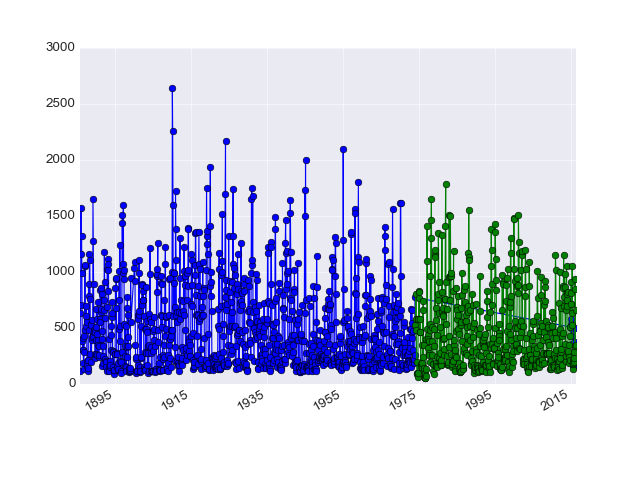

In [123]:
plt.figure()
q_df.dropna().plot(style='-o')
q_df2.dropna().plot(style='-o')

## Ecriture du fichier des débits 

In [130]:
df = pd.concat([q_df, q_df2]).dropna()
df.to_csv('data/export_q_complet.csv', header=False)